CS249 -- Spring 2016 -- D.S. Parker &copy; 2016

# HW1:  Maximum Likelihood Function Optimization

As in HW0,
the basic problem here is to determine, given an input sequence of real values,
which distribution it follows.
More specifically, for this assignment you are to develop a program that
reads in a numeric table, and -- for each dataset
(i.e., each column in the table) -- determines the
distribution and parameters that gives the closest match to it.

<blockquote>
<span style="color:blue;">
<i>
There are two differences between HW1 and HW0:
<ul><li>
in HW1, the input data are always drawn from the Gamma distribution.
</li><li>
in HW1, you must implement the Likelihood optimization yourself;
<br/>
<b>you cannot use</b> <tt>fitdistr()</tt>.
</li></ul>
</i>
</span>
</blockquote>

As in HW0, your notebook could read an input table like this:
<table>
<thead>
<tr><td> D1 </td><td> D2 </td><td> D3 </td><td> D4 </td><td> D5 </td><td> D6 </td></tr>
</thead>
    <tbody>
<!-- <tr><td> %       4.53256780 </td><td> 4.12387032 </td><td> 1.46654007 </td><td> 0.07384185 </td><td> 4.14580352 </td><td> 6.21513567 </td></tr> -->
 <tr><td> 7.1378018 </td><td> 6.8581740 </td><td> 0.2379494 </td><td> 0.1476523 </td><td> 5.3174948 </td><td> 3.1291521 </td></tr>
 <tr><td> 3.3713903 </td><td> 6.2437282 </td><td> 0.2138276 </td><td> 0.1699299 </td><td> 1.5583491 </td><td> 0.6543210 </td></tr>
<!-- <tr><td> %       2.7725880 </td><td> 5.5875745 </td><td> 0.4583172 </td><td> 0.3767378 </td><td> 2.8429449 </td><td> 1.9559299 </td></tr> -->
<tr><td> : </td><td> : </td><td> : </td><td> : </td><td> : </td><td> :  </td></tr>
<!-- <tr><td> %       7.2775941 </td><td> 5.2902876 </td><td> 0.9740191 </td><td> 2.6121070 </td><td> 5.9899608 </td><td> 6.7003783 </td></tr> -->
 <tr><td> 8.7408465 </td><td> 2.7770890 </td><td> 2.7271062 </td><td> 0.5956197 </td><td> 2.3983975 </td><td> 8.8628316 </td></tr>
</tbody>
</table>

The columns of this table define six datasets.
Your notebook should produce a CSV file <tt>HW1_output.csv</tt>
giving distributions that (it thinks) best fit the data.
A correct output file could then look like this:
<pre>
        gamma,3,1
        gamma,3,2
        gamma,3,3
        gamma,3,4
        gamma,3,5
        gamma,3,6
</pre>
For simplicity, the parameters used in this assignment will always be
integers, so the printed output should always have integer parameter values.

Your program can determine the distribution that fits best in any way you like.
However, the notebook sketches a way to do this,
and gives orientation about how to solve this problem in R.

In other words: yes, this is another simple assignment.  It is intended as a warmup.

After running your notebook on the test input file <tt>HW1_test.csv</tt>,
to complete this assignment please upload two files to CCLE:
<ul><li>
your output CSV file <tt>HW1_output.csv</tt>
</li><li>
your notebook file <tt>HW1_Fitting_Distributions.ipynb</tt>
</li></ul>

We will not execute your uploaded notebook.
It should have the commands you used to produce the output file ---
in order to show your work.
As announced, all assignment grading in this course will be automated,
and the notebook is needed in order to check results of the grading program.

<p style="color:blue;">
<b>Summary:</b> the basic problem is to use <b>Maximum Likelihood</b> to determine,
given a dataset of random real values, which distribution it follows.
Your notebook should read in a numeric table, and --
where each column in the table is a "dataset"
-- identify the distribution and Maximum Likelihood parameters that gives the closest match to it.
<br/><br/>
<b>Important Notes</b>:
</p>
<ul><li>
<p style="color:blue;">
For simplicity, the <b>parameters in this assignment will always be integers</b>.
Your printed output should always have integer parameter values.
</p>
<br/>
</li><li>
<p style="color:blue;">
<b>We will use Paul Eggert's Late Policy</b>: The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.
</p>
</li></ul>


## Specific problem: Maximum Likelihood Parameter Fitting for the Gamma Distribution

A random variable $x$  has some underlying probability distribution.  The pdf $f(z)$ for
this distribution usually depends on some parameters.  If we call these parameters "$\theta$"
we can write the pdf as  $f(z,\theta)$ or  $f(z\mid\theta)$.

There can be multiple parameters, so $\theta$ can be a vector, and it is perfectly fine to have
$\theta = (\theta_1, \theta_2, \theta_3)$ for example.

Here $f(z\mid\theta)$
reflects the probability of observing a given value $z$ for the random variable $x$.
Estimation is the process of finding values for the parameters $\theta$,
given some observations $x_1$, ..., $x_n$.

In <b>Maximum Likelihood Estimation</b>,
the idea is to find the value of $\theta$
that maximizes the likelihood of the observations $x_1$, ..., $x_n$  having been observed.

Although  $f(z\mid\theta)$ reflects the probability of observing a given value $z$ for $x$,
if we plug in the actually observed value $x_i$  then  $f(x_i\mid\theta)$
is not really a "probability".
R.A. Fisher called  $f(x_i \mid \theta)$
the <b>likelihood</b>  of observing $x_i$.
We want to find the
value of $\theta$ that maximizes the likelihood function

$$likelihood({x_1,...,x_n}) ~~=~~ \prod_{i=1}^n ~ f(x_i,\theta) .$$

The value of $\theta$ that maximizes this function is called the
<b>maximum likelihood estimate (MLE)</b>.

## Recall:  Maximum Likelihood Fit for the Normal Distribution

Suppose $f$ is a <b>normal distribution</b> with parameters
$\theta = (\mu,\sigma)$,
so that:

$$
f(x, \theta) ~~=~~ \frac{1}{\sqrt{2\pi}\sigma} ~ \exp\left(-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2 \right).
$$

In this case the likelihood function is:
$$\mbox{likelihood}({x_1,...,x_n}) ~~=~~ 
\prod_i ~ f(x_i, \theta) ~~=~~ \left(\frac{1}{\sqrt{2\pi}\sigma}\right)^n ~
\exp\left(-\frac{1}{2} \sum_i \left(\frac{x_i - \mu}{\sigma}\right)^2 \right) .
$$

The maximum likelihood estimate (value of $\theta$ that maximizes this function) clearly
must minimize $\sum_i (x_i - \mu)^2$.
By differentiating we can show that the minimum is obtained at
$$\mu ~~=~~ \frac{1}{n} \sum_i x_i .$$

In other words -- as discussed in class --
it turns out that the MLE is given by the usual formulas for $\mu$ and $\sigma$.

The maximum likelihood fit of a normal distribution to a dataset $x_1$, ..., $x_n$
has parameters that are the mean and variance of the data.
Finding the best fit for a normal distribution reduces to this.

## log-Likelihood

If the Likelihood is a product, its log (<b>log-likelihood</b>)
is a sum.  As a result it is easier to differentiate:

$$\log(~ \mbox{likelihood}({x_1,...,x_n}) ~ )
~~=~~ \log(~ \prod_i f(x_i, \theta) ~ )
~~=~~ \sum_i \log~ f(x_i, \theta).
$$
Since the logarithm function $\log(t)$ is a <b>monotonic function</b> of $t$
(larger values of $t$  yield larger values of $\log(t)$),
by maximizing log(likelihood) we will also maximize (likelihood).


# The Homework Problem: given an input set of data, find the MLE for the Gamma distribution

Given input values $x_1$, ..., $x_n$.
we want to find the MLE parameters ${\bf\theta} = (a,\beta)$,
where $\alpha$ is a shape parameter
and$\beta$ is a <i>rate</i> parameter.

The <b>Gamma distribution</b> has pdf
$$
\frac{\beta^{\alpha}}{\Gamma(\alpha)} ~ x^{\alpha-1} ~ e^{-\beta x}
$$
The distribution is described in
<a href="http://en.wikipedia.org/wiki/Gamma_distribution">the
Wikipedia article on the Gamma Distribution</a>.

## Plot some instances of the Gamma distribution

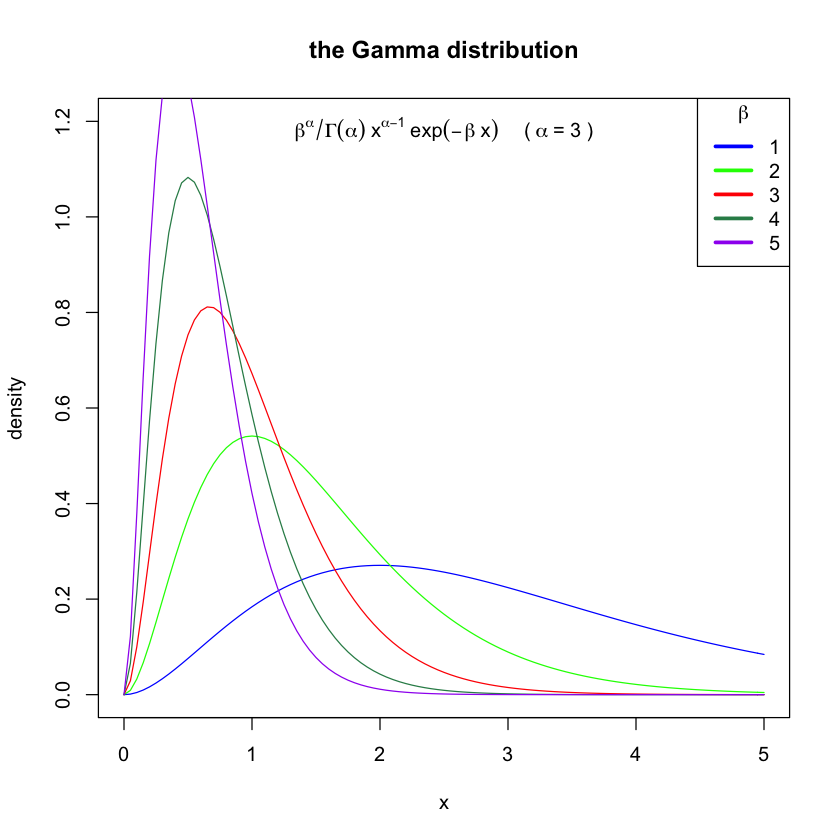

In [1]:
plot( c(), c(), type="n", main="the Gamma distribution",
     xlab="x", ylab="density",
     xlim=c(0,5), ylim=c(0,1.2) )  # start the basic plot

#  add a curve for each chi distribution parameter value:
curve( dgamma(x, 3, rate=1), col="blue",     add=TRUE )
curve( dgamma(x, 3, rate=2), col="green",    add=TRUE )
curve( dgamma(x, 3, rate=3), col="red",      add=TRUE )
curve( dgamma(x, 3, rate=4), col="seagreen", add=TRUE )
curve( dgamma(x, 3, rate=5), col="purple",   add=TRUE )

legend( "topright", paste(c(1,2,3,4,5)), title=expression(beta),
       col=c("blue","green","red","seagreen","purple"), lwd=3)

mtext( expression( beta^alpha/Gamma(alpha) ~ x^{alpha-1} ~ exp( -beta ~ x )~
                  ~~~~ "(" ~ alpha ~ "=" ~ "3 )"),  side=3, line=-2)

# The actual homework problem

<p style="color:blue;">
You are given an $n \times p$ table as input.
<br/><br/>
Each column of this table is a "dataset" of sample values $x_1$, ..., $x_n$ from a Gamma distribution.
<br/><br/>
Your job is to find Maximum Likelihood Estimates for the parameters
$\alpha$, $\beta$ for the Gamma distribution.
For this problem you can assume that the parameters are always integers,
so your program can round any non-integer value to the closest integer.
<br/><br/>
Your program should obtain parameter estimates for each column in the table, and print the result as a sequence of lines; each line should have the format "gamma,$\alpha$,$\beta$ --- where $\alpha$, $\beta$ are integers.
<br/><br/>
For example, if we were given a table with values for the five values of $\beta$ above, the output would be:
<pre>
gamma,3,1
gamma,3,2
gamma,3,3
gamma,3,4
gamma,3,5
</pre>
</p>

## Example:  the Log-Likelihood Function

In [1]:
beta = 3
alpha = 1
mu = 0

SampleDataset = rgamma(1000, alpha, rate=beta)
# a sample dataset

log_likelihood = function(theta) return(sum( log(dgamma(SampleDataset, theta[1], rate=theta[2])) ))


In [3]:
initial_value_for_theta = c(2.5, 2.8)
negative_log_likelihood = function(theta) return(-log_likelihood(theta))

# optim always _minimizes_ a function,
#   so to find the MLE we minimize the negative log likelihood:

# ? optim   # optimizer in R

output_of_optimization = optim( initial_value_for_theta, negative_log_likelihood )

print(output_of_optimization)

$par
[1] 0.9570908 2.9251855

$value
[1] -117.7978

$counts
function gradient 
      65       NA 

$convergence
[1] 0

$message
NULL



In [4]:
## minimum_negative_log_likelihood_value = output_of_optimization$value

MLE_parameter_values = round( output_of_optimization$par )

print(MLE_parameter_values)

[1] 1 3


In [5]:
# Finally:  print out the estimate for nu in the format required:

alpha = MLE_parameter_values[1]
beta = MLE_parameter_values[2]

cat(sprintf("Gamma distribution parameters: alpha = %d beta = %d\n", alpha, beta))

Gamma distribution parameters: alpha = 1 beta = 3


# Problem:   Fit a Gamma distribution to the input data.

# Step 1.  Extend the discussion above to fit a Gamma distribution to an input dataset

Your notebook should implement optimization of the Likelihood function.


### Your R program might be an extension of this outline:

<pre>
#  Read in a table (in csv format) from standard input:
Table = data.matrix(read.csv( file("stdin"), header=TRUE ))

for (j in 1:ncol(Table)) {
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table

    fit = suppressWarnings( optim( .... ) )
    
    alpha = round(fit$par[1])
    beta  = round(fit$par[2])
    # print integer parameters
    cat(sprintf("gamma,%d,%d\n", alpha, beta)
    ...
    
    }
}
</pre>


## Step 2.  The output of your program should be a CSV file "HW1_output.csv" 

### Your output CSV file "HW1_output.csv" should look like this:

<p style="color:blue;">
If your program had been given the demo input file <tt>HW1_demo_input.csv</tt> as input,
it should yield the following CSV file, a table with 6 rows, and THREE columns:
</p>
<pre>
gamma,3,1
gamma,3,2
gamma,3,3
gamma,3,4
gamma,3,5
gamma,3,6
</pre>
<p style="color:blue;">
<i>There should be NO header line in this file.</i>

Each row has THREE fields:  distribution name, and two parameter values.

If the input table has <i>p</i> columns (i.e., <i>p</i> random samples),
the output file should have <i>p</i> rows.

The parameters in this assignment will always be integers,
so the printed output should always have integer parameter values.
</p>

## Step 3. Run your notebook using the file "HW1_test.csv" as input.

## Step 4. Submit your output CSV file and notebook on CCLE.

<p style="color:blue;">
Upload your .ipynb and your .csv file for Assignment "HW1".  Both are required.
</p>

<p style="color:blue;">
We will use Paul Eggert's <b>Late Policy</b>: The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are deducted.
</p>

In [13]:
log_likelihood = function(theta,SampleDataset) return(sum( log(dgamma(SampleDataset, theta[1], rate=theta[2])) ))
negative_log_likelihood = function(theta,SampleDataset) return(-log_likelihood(theta,SampleDataset))

# optim always _minimizes_ a function, so to find the MLE we minimize the negative log likelihood:
initial_value_for_theta = c(2.5, 2.8)

    
#  Read in a table (in csv format) from standard input:
Table = data.matrix(read.csv( file("HW1_test.csv"), header=TRUE ))

for (j in 1:ncol(Table)) 
{
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table

    fit = suppressWarnings( optim( initial_value_for_theta, negative_log_likelihood ,SampleDataset=Dataset) )

    alpha = round(fit$par[1])
    beta  = round(fit$par[2])
    # print integer parameters
   # cat(sprintf("gamma,%d,%d\n", alpha, beta))
    x = t(c("gamma",alpha,beta))
    write.table(x, file = "HW1_output.csv", append = TRUE, quote = FALSE, sep = ",",
            eol = "\n", na = "", dec = ".", row.names = FALSE,
            col.names = FALSE, qmethod = c("escape", "double"),
            fileEncoding = "")
    
}

gamma,3,3
gamma,2,4
gamma,1,2
gamma,5,2
gamma,4,1
gamma,3,2
